# Genetic Algorithms (유전 알고리즘)

- Python Version : 3.11.9

In [30]:
import random # 난수 생성
import matplotlib.pyplot as plt # 데이터 시각화
import numpy as np # numpy 모듈 호출
import math # 수학 함수 호출
import time # 시간 측정을 위한 time import

## Problem 1: Fair Treasure Split (공평한 보물 분배 문제)

**Task**: 
두 사람이 서로 다른 크기(따라서 가격도 다른)의 다이아몬드가 들어 있는 보물을 발견했는데 가격 차이가 0(또는 최소)이 되도록 보물을 두 부분으로 나눠야 함

**Formal definition**: 
We have a set of numbers $S$. We need to split it into two subsets $S_1$ and $S_2$, such that $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ and $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

First of all, let's define the set $S$:

In [31]:
N = 200 # 200개 배열 생성 (다이아몬드 갯수)
S = np.array([random.randint(1,10000) for _ in range(N)]) # 1 ~ 10000 사이의 값을 추출함
print(S)

[1350 9383 1350  149 8264 8661 9905 8398  267 8272 2911 8037 5610 4067
 2719 4547 6094 7553 1244 4715 1021 7110 5047 5909 6899 6036 5407 9697
 8034 9867 9180 4068 3131 2610  847 4176 8995 1100 1692 2964 2402 1922
 6870 2336 2423 6886 2464 8538 5918 1292 7361  748  827 7929 9180 4076
 8294 7865 6640 2409 2678 7571 8633 2582 6435 1993 5246 4587 2660 7222
   30 5994 3518 9776 3601 2556 8899 2933 8452 6076  257 2295 2501 5025
 3694 2082 2885 8692 8034 8443 3504 8034 3866 1861 4824 9865 3589  121
 6314 7383 8902 4356 3742 4080 3860  857 9700 5254 2998 7740 7553 2747
 4764 7277 6578 6727 9161 7883 9362 3703 6526 2457 9138 1289 1950 3655
 9736 1695 5935 2979 2816 1009 6847  763 9444 8810 1583 9852 8779 2283
 7900  405 4385  342 3716 9208 2751 8935 5753 2922  621 3075 4566 9548
 8607 7704 9770 8187 7861 8727 5462 5425 3421 6433 9215 9378 8980 3082
 5361 6490 7963 6113 2578 3177 9426 7480  649 3178 4097 9331 8035 1085
 8350 6657 2273 7169 1309 2072 6737 1155 1293 3458 9788 9981 7178 5891
 6836 

Let's encode each possible solution of the problem by a binary vector $B\in\{0,1\}^N$, where the number on $i$-th position shows to which of the sets ($S_1$ or $S_2$) the $i$-th number in the original set $S$ belongs. `generate` function will generate those random binary vectors.

문제의 가능한 각 해결책을 이진 벡터 $B\in\{0,1\}^N$로 인코딩해 보겠습니다. 여기서 $i$번째 위치의 숫자는 원래 세트 $S$의 $i$번째 숫자가 세트($S_1$ 또는 $S_2$) 중 어느 것에 속하는지를 보여줍니다. '생성' 함수는 이러한 무작위 이진 벡터를 생성합니다.

0과 1로 이진 벡터로 인코딩을 하여 집합을 2개로 나눈다

In [32]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]


## fit 함수 정의

Let's now define `fit` function that calculates the "cost" of the solution. It will be the difference between sum or two sets, $S_1$ and $S_2$:

이제 fit을 정의한다. C1과 C2의 차이를 계산하여 절대값을 계산하는 함수로 정의한다

In [33]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

131896

## 돌연변이와 크로스오버에 대한 함수를 정의

- 돌연변이의 경우, 임의의 비트를 하나 선택해 무효화합니다(0에서 1로 또는 그 반대로 변경)
- 크로스오버의 경우, 한 벡터에서 일부 비트를 가져오고 다른 벡터에서 일부 비트를 가져옮
- 동일한 `생성` 함수를 사용하여 입력 마스크 중 어느 비트에서 가져올 비트를 무작위로 선택

In [34]:
def mutate(b): # 돌연변이 (임의의 비트를 하나 선택해서 무효화, 0->1 , 1->0으로 변경 진행)
    x = b.copy() # 입력된 리스트 b를 복사하여 x에 저장
    i = random.randint(0,len(b)-1) # 리스트의 인덱스 범위 내에서 무작위로 i를 선택
    x[i] = 1-x[i] # 선택된 인덱스 i의 값을 0이면 1로, 1이면 0으로 바꿈
    return x # 변이된 리스트 x를 반환

def xover(b1,b2): # 크로스오버 (한 벡터에서 일부 비트를 가져오고 다른 벡터에서 일부 비트를 가져옴)
    x = generate(b1) # b1과 동일한 길이의 새로운 리스트 x를 생성
    return b1*x+b2*(1-x) # x에 따라 b1과 b2의 요소를 교차하여 새로운 리스트를 반환

## 'pop_size' 크기의 솔루션 $P$의 초기 모집단(모 집단)을 생성

In [35]:
pop_size = 30 # 모 집단의 크기를 30으로 설정합니다. 즉, 30개의 개체를 생성
P = [generate(S) for _ in range(pop_size)] # 리스트 컴프리헨션을 사용하여 모 집단 P를 생성하는데 generate(S) 함수는 개체를 생성하는 함수로, pop_size만큼 반복하여 총 30개의 개체를 리스트 P에 저장

## 진화 수행 함수 정의

- 진화를 수행하는 함수
    - n`은 진화의 단계 수를 나타냅니다. 각 단계에서
        - 30%의 확률로 돌연변이를 수행하고, 돌연변이된 요소로 최악의 '적합' 함수를 가진 요소를 대체
        - 70%의 확률로 크로스오버를 수행

이 함수는 최상의 솔루션(최상의 솔루션에 해당하는 유전자)과 각 반복마다 모집단에서 최소 적합 함수의 이력을 반환

In [37]:
# genetic algorithm을 사용하여 주어진 모 집단(P)을 진화시키는 함수

def evolve(P,S=S,n=100000): #10000번 진화 진행
    res = [] # res 리스트를 초기화
    for _ in range(n): # n번 반복 (10000번)
        f = min([fit(b) for b in P]) # 모 집단 P의 모든 개체에 대해 fit 함수를 사용하여 적합도를 계산하고, 최소 적합도 f를 구함
        res.append(f) # f를 res 리스트에 추가 
        if f==0: # 만약 f가 0 == 최적 해를 찾으면 반복을 중단
            break
        
        # 3 : 7로 돌연변이, 크로스오버 수행
        
        if random.randint(1,10)<3: # 30% 확률로 돌연변이를 수행 (중요)
            i = random.randint(0,len(P)-1) # 무작위로 선택한 개체 P[i]에 대해 mutate 함수를 적용하여 돌연변이를 생성
            b = mutate(P[i]) # 돌연변이 진행 (mutate 함수)
            i = np.argmax([fit(z) for z in P]) 
            P[i] = b # 가장 적합도가 높은 개체를 돌연변이된 개체로 대체함
        
        else: # 70% 확률로 교차를 수행
            i = random.randint(0,len(P)-1) # 두 개체 P[i], P[j]를 무작위로 선택하여 xover 함수를 사용해 교차를 생성
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]): # 교차된 개체 b의 적합도가 부모 중 하나보다 낮으면, 그 부모를 b로 대체
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P]) # 적합도가 가장 낮은 (즉, 가장 좋은) 개체를 선택하여 반환
    return (P[i],res) # res 리스트와 함께 반환하여 적합도의 변화를 추적할 수 있게 함

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1
 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0] 2


상단의 결과를 보면, 적합도는 마지막에 2로 확인 가능하다.

- '적합도' 함수를 상당히 최소화했음을 알 수 있음
- 다음은 전체 모집단에 대한 '적합도' 함수가 프로세스 중에 어떻게 작동하는지 보여주는 그래프

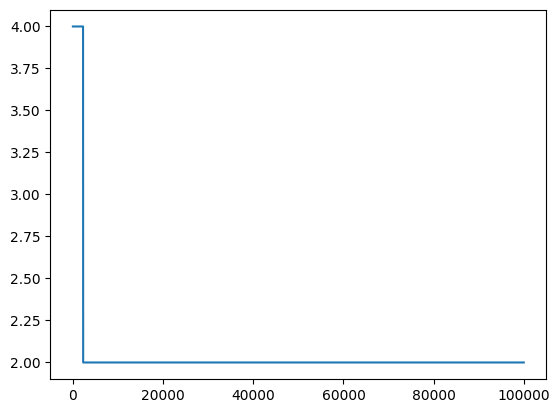

In [39]:
# 적합도에 대한 그래프 출력

plt.plot(hist)
plt.show()

## Problem 2: N Queens Problem (N개의 여왕 문제 (체스))

https://namu.wiki/w/%EC%97%AC%EB%8D%9F%20%ED%80%B8%20%EB%AC%B8%EC%A0%9C <- 기본 개념 및 정리 링크

**Task**:
1. 서로 공격하지 않는 방식으로 $N$ x $N$ 크기의 체스 판에 $N$ 개의 여왕을 배치함

2. 우선, 전체 검색 (brute force)을 사용하여 유전 알고리즘 없이 문제를 해결

3. 우리는 보드의 상태를 목록 $L$로 나타낼 수 있는데, 여기서 목록의 $i$ 번째 숫자는 $i$ 음째 행에 있는 여왕의 수평 위치힘

4. 각 솔루션에는 행당 여왕이 하나만 있음

- 목표는 문제에 대한 첫 번째 해결책을 찾는 것이며, 그 이후에는 검색을 중단
- 이 함수를 쉽게 확장하여 여왕의 가능한 모든 위치를 생성할 수 있음

In [51]:
# 8-퀸 문제를 해결하는 알고리즘
# 8개의 퀸을 체스 보드 위에 놓되, 서로가 공격하지 않도록 배치하는 문제
# 깊이 우선 탐색(DFS)을 사용하여 퀸을 배치하며, 백트래킹을 통해 해결책을 찾음
#nqueens([], 8)은 빈 리스트로 시작하여 8개의 퀸을 배치하는 문제를 해결

N = 8 # N = 8로 보드의 크기를 8x8로 설정 (보드 크기 지정)

def checkbeats(i_new,j_new,l): # 현재 퀸 위치 (i_new, j_new)가 이전 퀸들과 충돌 여부를 확인함
    for i,j in enumerate(l,start=1):
        if j==j_new: # 같은 열에 있거나, 대각선에 있으면 False를 반환하여 충돌을 나타냄
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True): # nqueens 함수
    if len(l)==N: # 모든 퀸을 배치한 경우
        if disp: print(l) # 결과를 출력
        return True
    else: # 가능한 모든 열에 대해 퀸을 배치하고, 가능한 경우 재귀 호출을 통해 다음 퀸을 배치
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l): # 새로운 퀸을 배치할 수 있는지 확인
                l.append(j) # 가능한 위치에 퀸을 배치
                if nqueens(l,N,disp): return True # 해결된 경우
                else: l.pop() # 배치가 불가능한 경우 백트래킹을 통해 마지막 배치를 취소
        return False
            
nqueens([],8) # 빈 리스트로 시작하여 8-퀸 문제를 해결


[1, 5, 8, 6, 3, 7, 2, 4]


True

상단 결과는 행에 해당하는 Queen의 열의 위치를 출력함

## 20-퀸즈 문제에 대한 해결책을 얻는 데 얼마나 걸리는지 측정

In [52]:
%timeit nqueens([],20,False)

1.65 s ± 8.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


상단의 출력 결과를 확인하면, 대략 클럭스피드로는 13초 정도가 나옴을 확인 가능함

## genetic algorithm을 사용하여 동일한 문제를 해결 (fit 함수 정의)

각 해를 동일한 길이 $N$의 목록으로 표현하고, 서로를 공격하는 여왕의 수를 '적합' 함수로 간주

In [53]:
# N-퀸 문제에서 주어진 퀸 배치의 적합도를 계산하는 함수
# 각 퀸이 서로 공격할 수 있는지를 확인하고, 공격 가능한 경우를 세어 그 값을 반환
# 높은 적합도 값은 더 많은 공격이 일어나는 배치를 의미
# N-퀸 문제에서 현재 배치의 적합도를 계산하여, 적합도가 낮을수록 (즉, x 값이 낮을수록) 더 나은 배치임을 의미

def fit(L):
    x=0 # 공격 가능한 경우를 셀 변수 x를 초기화
    for i1,j1 in enumerate(L,1): # 각 퀸의 위치를 열거합니다 (1부터 시작) - i1은 행 번호, j1은 열 번호
        for i2,j2 in enumerate(L,1): # 다른 퀸의 위치를 열거합니다 (1부터 시작)
            if i2>i1: # 중복 계산을 피하기 위해 i2가 i1보다 클 때만 검사
                if j2==j1 or (abs(j2-j1)==i2-i1): # 같은 열에 있거나 대각선에 있는지 확인
                    x+=1 # 공격 가능한 경우 x를 증가
    return x # 공격 가능한 경우의 수를 반환

- 적합도 함수를 계산하는 데 시간이 많이 걸리므로 각 솔루션을 적합도 함수의 값과 함께 모집단에 저장
- 초기 모집단을 생성

In [54]:
# N-퀸 문제를 해결하기 위한 초기 모 집단을 생성하는 함수
# generate_one 함수는 하나의 퀸 배치를 무작위로 생성하고, 그 배치의 적합도를 계산
# generate 함수는 여러 개의 이러한 배치를 생성하여 모 집단을 만듦

# 하나의 퀸 배치를 무작위로 생성하고 그 배치의 적합도를 계산하는 함수
def generate_one(N): # # 하나의 퀸 배치를 무작위로 생성하고 그 배치의 적합도를 계산
    x = np.arange(1,N+1) # 1부터 N까지의 숫자를 배열로 생성
    np.random.shuffle(x) # 배열을 무작위로 섞음
    return (x,fit(x)) # 섞인 배열과 그 배열의 적합도 값을 반환

# 여러 개의 퀸 배치를 생성하여 모 집단을 만드는 함수
def generate(N,NP):
    return [generate_one(N) for _ in range(NP)] # NP개의 무작위 배치를 생성

# 예시: 8-퀸 문제를 위한 5개의 초기 배치를 생성
generate(8,5)

[(array([6, 1, 5, 4, 8, 7, 2, 3]), 3),
 (array([8, 3, 1, 7, 2, 4, 5, 6]), 6),
 (array([3, 7, 2, 8, 4, 6, 5, 1]), 7),
 (array([8, 7, 3, 5, 2, 6, 1, 4]), 5),
 (array([5, 1, 4, 3, 2, 7, 6, 8]), 8)]

## 돌연변이와 크로스오버 함수를 정의

- 크로스오버는 두 유전자를 임의의 지점에서 분리하고 서로 다른 유전자의 두 부분을 연결하여 결합

In [58]:
# 유전자 알고리즘에서 사용되는 돌연변이와 교차 연산을 정의

# 무작위로 선택한 위치의 값을 변경하여 돌연변이를 수행
# G 배열의 무작위 위치를 선택하여 새로운 무작위 값으로 변경
def mutate(G):
    x=random.randint(0,len(G)-1) # 배열 G의 무작위 인덱스 x를 선택
    G[x]=random.randint(1,len(G)) # G[x]의 값을 1부터 배열 길이까지의 무작위 값으로 변경
    return G # 변경된 배열을 반환

# 두 부모 배열 G1과 G2를 교차하여 새로운 자손 배열을 생성    
def xover(G1,G2):
    x=random.randint(0,len(G1)) # 배열 길이 내의 무작위 인덱스 x를 선택
    return np.concatenate((G1[:x],G2[x:])) # G1의 앞부분과 G2의 뒷부분을 결합하여 새로운 배열을 반환

xover([1,2,3,4],[5,6,7,8]) # 예시: 두 배열 [1, 2, 3, 4]와 [5, 6, 7, 8]을 교차

array([1, 6, 7, 8])

상단의 크로스오버의 결과를 보면 2번 위치가 인덱스 x로 지정되어 결합이 일어났음을 확인 가능하다

## 부모를 선택하는 방법을 정의함

- 더 나은 적합성 함수를 가진 유전자를 더 많이 선택함으로써 유전자 선택 과정을 개선
- 유전자의 선택 확률은 적합도 함수에 따라 달라짐

In [62]:
# 유전자 알고리즘에서 부모를 선택하기 위한 두 가지 방법을 구현
# 각 방법은 모 집단 P에서 적합도를 기반으로 부모를 선택
# choose_rand 함수는 확률적으로 두 부모를 선택하며, choose 함수는 룰렛 휠 선택 방법을 사용
# 두 함수 모두 적합도 값을 바탕으로 부모를 선택하지만, 접근 방식이 다름
# 두 함수 모두 유전자 알고리즘에서 부모 선택을 수행하는 데 사용되며, 각 방법은 적합도 값을 바탕으로 개체를 선택하여 더 나은 해를 찾기 위한 진화 과정을 도움

# 모 집단에서 두 부모를 확률적으로 선택하는 간단한 방법
def choose_rand(P):
    N=len(P[0][0]) # 하나의 개체의 크기를 구함
    mf = N*(N-1)//2 # 최대 적합도 값을 계산
    z = [mf-x[1] for x in P] # 각 개체의 적합도 값을 최대 적합도 값에서 뺀 값을 계산
    tf = sum(z) # 총 적합도 값을 계산
    w = [x/tf for x in z] # 각 개체의 선택 확률을 계산
    p = np.random.choice(len(P),2,False,p=w) # 두 부모를 확률적으로 선택
    return p[0],p[1] # 선택된 부모의 인덱스를 반환

# 룰렛 휠 선택 방법을 사용하여 부모를 선택하며, 두 부모가 동일하지 않도록 함
def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random() # 0과 1 사이의 무작위 값을 생성
            p = [i for i,x in enumerate(P) if x[1]>=r] # 무작위 값 r보다 크거나 같은 적합도 값을 가진 개체의 인덱스를 선택
        return random.choice(p) # 선택된 인덱스 중 하나를 무작위로 반환
    N=len(P[0][0]) # 하나의 개체의 크기를 구
    mf = N*(N-1)//2 # 최대 적합도 값을 계산
    z = [mf-x[1] for x in P] # 각 개체의 적합도 값을 최대 적합도 값에서 뺀 값을 계산
    tf = sum(z) #총 적합도 값을 계산 
    w = [x/tf for x in z] # 각 개체의 선택 확률을 계산
    p1=p2=0 
    while p1==p2: # 두 부모가 동일하지 않도록 반복
        p1 = ch(w) # 첫 번째 부모를 선택
        p2 = ch(w) # 두 번째 부모를 선택
    return p1,p2 # 선택된 부모의 인덱스를 반환

## 주요 진화 (evolutionary) 루프를 정의
- 완벽한 솔루션(적합도 함수=0)을 얻을 때까지 반복하고, 각 단계에서 현재 세대를 취하고 같은 크기의 새로운 세대를 생성
- 이 작업은 다음 단계에 따라 `nxgeneration` 함수를 사용하여 수행

    - 가장 부적합한 솔루션 버리기 - 이를 수행하는 `discard_unfit` 함수가 있음
    - 생성에 임의의 솔루션을 더 추가
    - 각각의 새로운 유전자에 대해 다음 단계를 사용하여 새로운 크기의 `gen_size` 세대를 채움
        - 적합도 함수에 비례하는 확률로 두 개의 무작위 유전자를 선택
        - 크로스오버를 계산
        - 확률 `mutation_prob`으로 돌연변이를 적용

In [66]:
# 유전자 알고리즘을 사용하여 N-퀸 문제를 해결하는 전체 프로세스를 구현

mutation_prob = 0.1 # 10%로 지정

# 적합도가 낮은 개체들을 걸러내는 함수
def discard_unfit(P):
    P.sort(key=lambda x:x[1]) # 적합도에 따라 정렬
    return P[:len(P)//3] # 상위 1/3만 반환

# 다음 세대를 생성하는 함수 (nxgeneration())
def nxgeneration(P):
    gen_size=len(P) # 현재 세대의 크기
    P = discard_unfit(P) # 적합도가 낮은 개체를 버림
    P.extend(generate(len(P[0][0]),3)) # 새로운 무작위 개체를 추가
    new_gen = [] # 새로운 세대를 저장할 리스트
    
    for _ in range(gen_size):
        p1,p2 = choose_rand(P) # 두 부모를 선택
        n = xover(P[p1][0],P[p2][0]) # 교차를 통해 새로운 개체를 만듦
        if random.random()<mutation_prob: # 돌연변이 확률에 따라 돌연변이를 적용
            n=mutate(n)
        nf = fit(n) # 새로운 개체의 적합도를 계산
        new_gen.append((n,nf)) # 새로운 세대에 추가
    
    return new_gen # 새로운 세대를 반환

# 전체 진화 과정을 관리 (위 과정을 genetic() 함수로 묶어서 하나의 함수로 정의함)
def genetic(N,pop_size=100):
    P = generate(N,pop_size) # 초기 세대를 생성
    mf = min([x[1] for x in P]) # 최소 적합도를 찾음
    n=0
    while mf>0: # 적합도가 0보다 클 때까지 반복
        n+=1
        mf = min([x[1] for x in P]) # 최소 적합도를 갱신
        P = nxgeneration(P) # 다음 세대를 생성
    mi = np.argmin([x[1] for x in P]) # 최적의 개체를 찾음
    return P[mi] # 최적의 개체를 반환

genetic(8) # 8-퀸 문제를 해결

(array([4, 8, 1, 3, 1, 6, 2, 5]), 1)

적합도는 마지막 숫자인 1임을 확인 가능함

- 대부분의 경우 매우 빠르게 솔루션을 얻을 수 있지만 드물게 최적화가 로컬 최소값에 도달하고 프로세스가 오랫동안 멈추는 경우가 있을 수 있음
- 평균 시간을 측정할 때 이를 고려하는 것이 중요
- 대부분의 경우 유전 알고리즘이 전체 검색보다 빠르지만 경우에 따라 더 오래 걸릴 수 있음
- 이 문제를 극복하기 위해 고려할 세대의 수를 제한하고, 해결책을 찾을 수 없는 경우 처음부터 다시 시작하는 것이 좋음

In [67]:
%timeit genetic(20)

The slowest run took 51.03 times longer than the fastest. This could mean that an intermediate result is being cached.
38 s ± 32.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
